# WeatherPy

### Analysis
- Observed Trend 1: Currently (May 30th), the cities with the highest temperature on the earth are in between the 20 and 40 degrees north latitude. In the other hand, the cities farthest away from the Equator register the lowest temperatures

- Observed Trend 2: At this moment (May 30th) the cities south of the Equator are the ones with higher humidity. Most cities have more than 60% of humidity.

- Observed Trend 3: Compare the cloudiness chart and the wind speed chart, it appears that the cloudiness has a correlation with the wind speed. Some cities with the wind speed lowers than 5 mph tend to have the lowest cloudiness in percent.

In [1]:
# Dependencies
import requests
import json
from pprint import pprint
import random
from config import api_key
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating random longitudes and latitude

# Latitude
random.seed(1)
lat = random.sample(list(range(-9000,9000)),1500) #1500 samples: lat range [-90.00;90.00]. Numbers will be divided by 100 later on.
# Longitude
random.seed(2)
lng = random.sample(list(range(-18000,18000)),1500) #1500 samples: lng range [-180.00;180.00]. Numbers will be divided by 100 later on.

- With the citipy Python library we can get the nearest city given the longitude and latitude coordinates. In this case we are generating random coordinates to obtained 500 unique cities. Therefore, if there is a city that has been considered before the code is going to ignore the city and jump to the next one.
- There are some cities that are in the citipy database but not on the weather app. In those cases it will jump to the other city ignoring the one that could not retrieve any data. 

In [3]:
# Setting the parameters for the weather page
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

c=0
cities1 = []
countries = []

# Data from the weather app
temp_max = []
humidity = []
clouds = []
wind_speed = []
lat_city = []
lon_city = []
date = []
city_app = []
country_app = []

print("Beginning Data Retrieval")
print("-"*40)
for lati, long in zip(lat, lng):
    city1 = citipy.nearest_city((lati/100), (long)/100)
    cit = city1.city_name
    country = city1.country_code
    # Taking the dupplicates cities out the list
    # If the "city, country" are not listed already
    if cit not in cities1 or country not in countries:
        #print(cit)
        #print(country)
        cities1.append(cit)
        countries.append(country)
        #query_url = url + "appid=" + api_key + "&q=" + cit + "," + country
        query_url = f"{url}appid={api_key}&units={units}&q={cit},{country}"
        #print(query_url)
        response = requests.get(query_url).json()
        # Whenever it doesnt find a city in the weather app:
        test = 0
        try:
            temp_max.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            lat_city.append(response["coord"]["lat"])
            lon_city.append(response["coord"]["lon"])
            date.append(response["dt"])
            city_app.append(response["name"])
            country_app.append(response["sys"]["country"])
            print(query_url)
            
        except (KeyboardInterrupt, SystemExit):
            raise
        except Exception as exp:
            #print(f"caught exception {exp}")
            test +=1
            continue
   
        c+=1 #Counter: Add +1 when it retrieves valid data 
        if c==500:
            print("-"*40)
            print("Data Retrieval Complete")
            print("-"*40)
            break
print(c)

Beginning Data Retrieval
----------------------------------------
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=atuona,pf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=clyde river,ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=piltene,lv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hofn,is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ribeira grande,pt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=avarua,ck
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=punta arenas,cl
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aklavik,ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=souillac,mu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=shubarkuduk,kz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=husavik,is
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kapaa,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port hardy,ca
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nome,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kahului,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kargil,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rio grande,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mount gambier,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=namibe,ao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rantepao,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=warrington,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kulhudhuffushi,mv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tilichiki,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f1

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tasiilaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mathathane,bw
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=huruta,et
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=changzhou,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=juegang,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lebu,cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=serra talhada,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tourlaville,fr
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0b

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=padang,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nanortalik,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint george,bm
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=naduvattam,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=conde,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=muncie,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kutum,sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nova prata,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sungaipenuh,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port hedland,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=narsaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=katangli,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=muisne,ec
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nortelandia,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=novobirilyussy,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santa cruz de tenerife,es
http://api.openweathermap.org/data/2.5/weather?appid=2

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kongoussi,bf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dwarka,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port blair,in
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-denis,re
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lubango,ao
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sembe,cg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=roswell,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san pedro,bz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kawalu,id
----------------------------------------
Data Retrieval Complete
----------------------------------------
500


In [4]:
# Creating a data frame with the data obtained from the weather app
city_data = pd.DataFrame(
    {"City": city_app, "Cloudiness": clouds, "Country": country_app, "Date": date, "Humidity": humidity, 
     "Lat": lat_city, "Lon": lon_city, "Max Temp": temp_max, "Wind Speed": wind_speed}
)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Rikitea,0,PF,1527732688,100,-23.12,-134.97,75.44,9.86
1,Atuona,0,PF,1527732688,100,-9.80,-139.03,80.30,16.58
2,Clyde River,90,CA,1527730860,98,70.47,-68.59,32.00,10.29
3,Piltene,0,LV,1527731400,93,57.23,21.67,53.60,5.82
4,Hofn,56,IS,1527732689,97,64.25,-15.21,45.74,1.10


### Latitude vs Temperature Plot

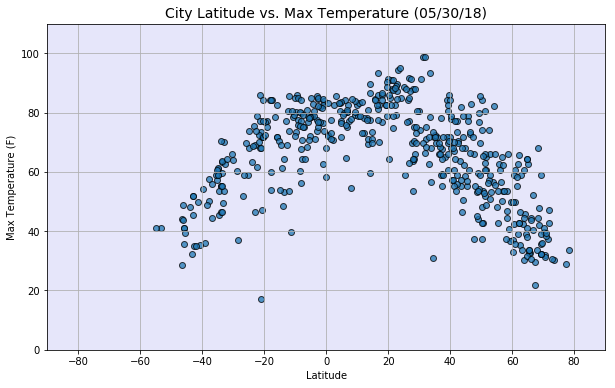

In [13]:
x_axis = lat_city
y_axis = temp_max

fig, ax = plt.subplots(figsize=(10, 6))


#fig.patch.set_color("lightblue")
ax.patch.set_color("lavender")
ax.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid(True)

plt.xlim(-90, 90)
plt.ylim(0, 110)

# Set the Titles
plt.title("City Latitude vs. Max Temperature (05/30/18)", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/Latitude_Max_Temperature.png")
plt.show()

### Latitude vs Humidity Plot

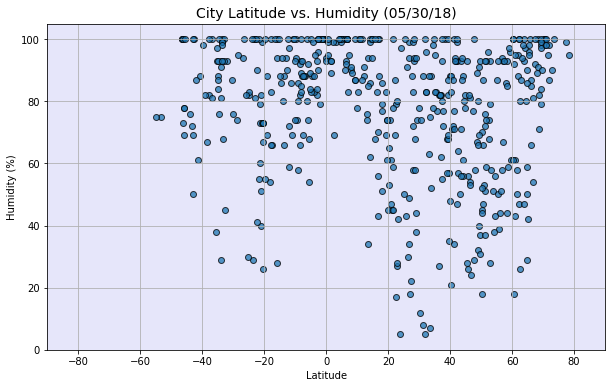

In [14]:
x_axis = lat_city
y_axis = humidity

fig, ax = plt.subplots(figsize=(10, 6))

ax.patch.set_color("lavender")

ax.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid(True)

plt.xlim(-90, 90)
plt.ylim(0, 105)

# Set the Titles
plt.title("City Latitude vs. Humidity (05/30/18)", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/Latitude_Humidity.png")
plt.show()

### Latitude vs. Cloudiness Plot

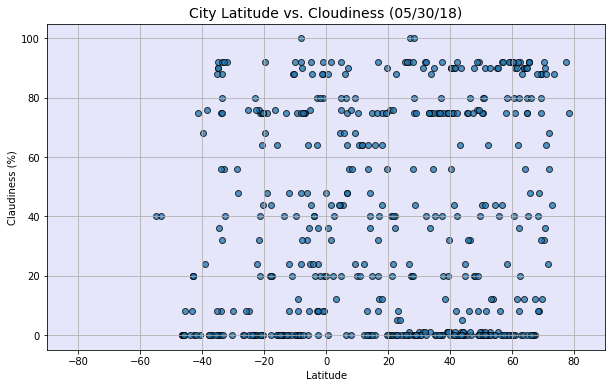

In [17]:
x_axis = lat_city
y_axis = clouds

fig, ax = plt.subplots(figsize=(10, 6))

ax.patch.set_color("lavender")

ax.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid(True)

plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Set the Titles
plt.title("City Latitude vs. Cloudiness (05/30/18)", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Claudiness (%)")

plt.savefig("Images/Latitude_Cloudiness.png")
plt.show()

### Latitude vs. Wind Speed Plot

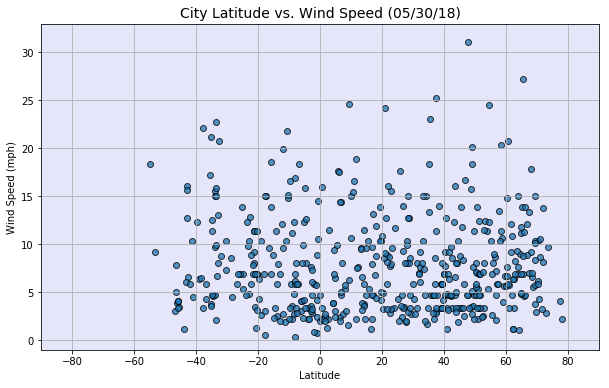

In [21]:
x_axis = lat_city
y_axis = wind_speed

fig, ax = plt.subplots(figsize=(10, 6))

ax.patch.set_color("lavender")

ax.scatter(x_axis, y_axis, edgecolors="black", alpha=0.75)
plt.grid(True)

plt.xlim(-90, 90)
plt.ylim(-1, 33)

# Set the Titles
plt.title("City Latitude vs. Wind Speed (05/30/18)", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/Latitude_Wind_Speed.png")
plt.show()